<a href="https://colab.research.google.com/github/iclalseymakoca/Volcano/blob/main/Volcano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset includes worldwide volcano data.

Questions I asked:

Which countries have active volcanoes?
What are the types and sizes of damage due to volcanic activity?

# **Adding Libraries**

In [14]:
import pandas as pd 
import numpy as np
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [16]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: ignored

# **Reading Files and Viewing Their Contents**

In [2]:
df=pd.read_csv("/content/Volcano_Events.csv")

In [3]:
df.head

<bound method NDFrame.head of             Search Parameters    Year    Mo    Dy     Tsu  Eq  \
0    ["1900 <= Year >= 2023"]     NaN   NaN   NaN     NaN NaN   
1                         NaN  1900.0   1.0  22.0     NaN NaN   
2                         NaN  1900.0   2.0  16.0     NaN NaN   
3                         NaN  1900.0   7.0  17.0     NaN NaN   
4                         NaN  1900.0   NaN   NaN     NaN NaN   
..                        ...     ...   ...   ...     ...  ..   
495                       NaN  2021.0  12.0   4.0     NaN NaN   
496                       NaN  2022.0   1.0  15.0  5824.0 NaN   
497                       NaN  2022.0   6.0  22.0     NaN NaN   
498                       NaN  2022.0  10.0   9.0  5865.0 NaN   
499                       NaN  2022.0  12.0   4.0  5868.0 NaN   

                          Name          Location    Country  Latitude  ...  \
0                          NaN               NaN        NaN       NaN  ...   
1                    Asamayama   

In [4]:
df.tail

<bound method NDFrame.tail of             Search Parameters    Year    Mo    Dy     Tsu  Eq  \
0    ["1900 <= Year >= 2023"]     NaN   NaN   NaN     NaN NaN   
1                         NaN  1900.0   1.0  22.0     NaN NaN   
2                         NaN  1900.0   2.0  16.0     NaN NaN   
3                         NaN  1900.0   7.0  17.0     NaN NaN   
4                         NaN  1900.0   NaN   NaN     NaN NaN   
..                        ...     ...   ...   ...     ...  ..   
495                       NaN  2021.0  12.0   4.0     NaN NaN   
496                       NaN  2022.0   1.0  15.0  5824.0 NaN   
497                       NaN  2022.0   6.0  22.0     NaN NaN   
498                       NaN  2022.0  10.0   9.0  5865.0 NaN   
499                       NaN  2022.0  12.0   4.0  5868.0 NaN   

                          Name          Location    Country  Latitude  ...  \
0                          NaN               NaN        NaN       NaN  ...   
1                    Asamayama   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Year                                499 non-null    float64
 2   Mo                                  487 non-null    float64
 3   Dy                                  459 non-null    float64
 4   Tsu                                 92 non-null     float64
 5   Eq                                  33 non-null     float64
 6   Name                                499 non-null    object 
 7   Location                            499 non-null    object 
 8   Country                             499 non-null    object 
 9   Latitude                            499 non-null    float64
 10  Longitude                           499 non-null    float64
 11  Elevation (m)                       499 non-n

In [6]:
df.nunique()

Search Parameters                       1
Year                                  115
Mo                                     12
Dy                                     31
Tsu                                    92
Eq                                     33
Name                                  184
Location                               66
Country                                41
Latitude                              183
Longitude                             184
Elevation (m)                         177
Type                                   16
VEI                                     7
Agent                                  48
Deaths                                 81
Death Description                       4
Missing                                10
Missing Description                     4
Injuries                               43
Injuries Description                    4
Damage ($Mil)                          21
Damage Description                      4
Houses Destroyed                  

<Axes: >

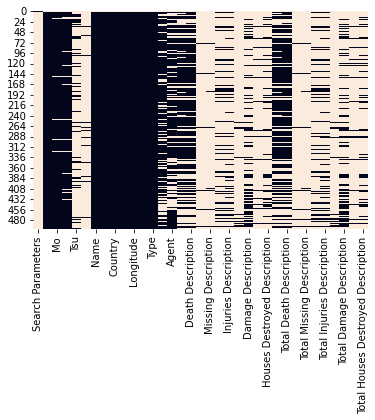

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
df.describe()

,Year,Mo,Dy,Tsu,Eq,Latitude,Longitude,Elevation (m),VEI,Deaths,...,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
count,499.000000,487.000000,459.000000,92.000000,33.000000,499.000000,499.000000,499.000000,362.000000,318.000000,...,329.000000,350.000000,10.00000,13.000000,90.000000,113.000000,26.000000,155.000000,38.000000,82.000000
mean,1971.769539,6.507187,15.747277,2992.206522,7079.303030,11.149854,55.748367,2040.428858,2.508287,263.339623,...,287.504559,1.334286,375.00000,2.076923,541.633333,1.469027,198.078154,1.754839,1095.394737,2.097561
std,35.425767,3.319020,9.085797,1681.169004,2754.985725,24.105110,102.030196,1258.907980,1.032002,2069.993219,...,2102.313546,0.793759,666.56916,1.187542,3515.251750,0.856392,425.089307,0.969281,1982.916260,1.106767
min,1900.000000,1.000000,1.000000,1280.000000,2595.000000,-63.001000,-177.920000,-360.000000,0.000000,1.000000,...,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1946.000000,4.000000,8.000000,1648.750000,4876.000000,-7.540000,-61.083000,1138.000000,2.000000,1.000000,...,1.000000,1.000000,9.25000,1.000000,3.000000,1.000000,3.673000,1.000000,17.250000,1.000000
50%,1979.000000,7.000000,16.000000,2191.500000,6652.000000,10.412000,112.314000,1807.000000,2.000000,3.000000,...,3.000000,1.000000,61.00000,2.000000,10.500000,1.000000,19.500000,1.000000,215.000000,2.000000
75%,2001.000000,9.000000,24.000000,4345.750000,10140.000000,32.884000,131.104000,2885.000000,3.000000,17.000000,...,22.000000,1.000000,201.75000,3.000000,32.000000,2.000000,118.750000,2.000000,1010.750000,3.000000
max,2022.000000,12.000000,31.000000,5868.000000,10556.000000,65.715000,177.180000,6377.000000,6.000000,28000.000000,...,28000.000000,4.000000,1755.00000,4.000000,31943.000000,4.000000,2000.000000,4.000000,9000.000000,4.000000


In [10]:
df.corr()

,Year,Mo,Dy,Tsu,Eq,Latitude,Longitude,Elevation (m),VEI,Deaths,...,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
Year,1.000000,0.009667,0.013080,0.628942,0.390809,-0.027093,-0.002000,0.106537,0.010330,-0.110063,...,-0.125272,-0.184324,-0.317746,-3.682683e-01,0.115110,-0.141253,-0.000855,1.084778e-01,-0.109671,-0.118352
Mo,0.009667,1.000000,0.033684,-0.084309,-0.078193,0.045696,0.024631,0.016634,-0.042743,0.021214,...,0.030551,0.028178,-0.125966,-4.362386e-01,0.209854,0.000235,-0.025430,1.063021e-01,-0.206611,-0.050084
Dy,0.013080,0.033684,1.000000,-0.061031,0.173548,0.027064,0.021586,0.023216,-0.048548,-0.022653,...,-0.010539,0.085645,0.020344,-1.760863e-01,0.072603,-0.008326,0.171110,2.909110e-03,0.087870,0.025295
Tsu,0.628942,-0.084309,-0.061031,1.000000,0.687216,0.113179,0.110551,-0.140319,-0.156345,-0.224075,...,-0.190840,-0.203232,NaN,-1.000000e+00,0.361387,-0.157892,-0.011468,1.361097e-01,0.096138,0.024338
Eq,0.390809,-0.078193,0.173548,0.687216,1.000000,-0.035000,0.121459,-0.153174,-0.302048,0.144329,...,0.206402,0.060851,NaN,NaN,-0.161816,-0.337988,-0.088650,4.268727e-02,0.217074,-0.406486
Latitude,-0.027093,0.045696,0.027064,0.113179,-0.035000,1.000000,0.030627,-0.099718,0.020786,-0.018460,...,-0.017838,-0.111234,0.224924,4.073552e-02,-0.098701,-0.067084,0.294946,-1.067704e-01,-0.113980,-0.071755
Longitude,-0.002000,0.024631,0.021586,0.110551,0.121459,0.030627,1.000000,-0.252789,-0.122668,-0.121953,...,-0.134505,-0.035993,-0.286750,-1.015523e-01,-0.016675,0.089391,-0.164399,-9.392268e-02,0.288482,-0.005193
Elevation (m),0.106537,0.016634,0.023216,-0.140319,-0.153174,-0.099718,-0.252789,1.000000,0.066768,0.061119,...,0.074350,0.023755,-0.394365,-2.126155e-01,-0.081035,0.014649,0.081043,-9.522200e-02,-0.139978,0.072850
VEI,0.010330,-0.042743,-0.048548,-0.156345,-0.302048,0.020786,-0.122668,0.066768,1.000000,0.148566,...,0.183522,0.274304,0.538493,4.641415e-01,0.072460,0.268821,0.274093,1.734474e-01,0.353970,0.280178
Deaths,-0.110063,0.021214,-0.022653,-0.224075,0.144329,-0.018460,-0.121953,0.061119,0.148566,1.000000,...,0.980450,0.406900,0.831476,7.235279e-01,0.992479,0.397919,-0.126446,1.318629e-02,0.629723,0.262073


# **EDA**

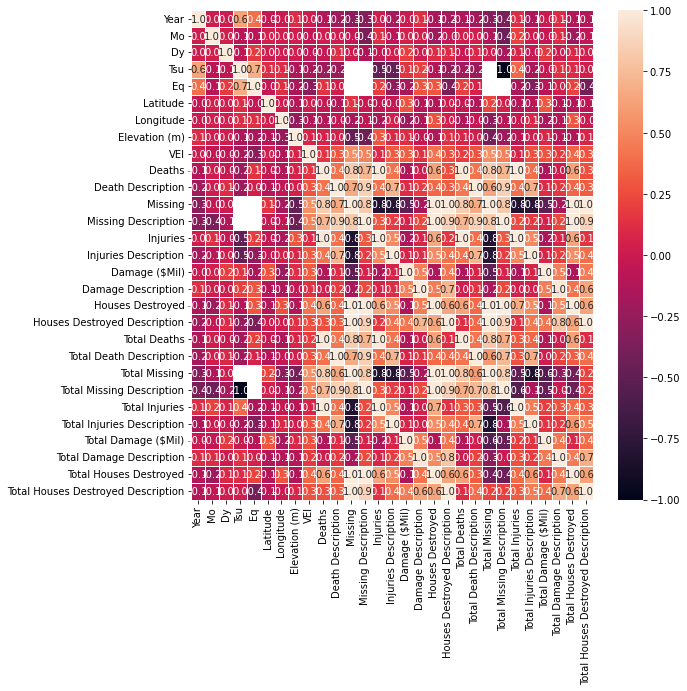

In [11]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()